In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from utility_functions import FDRthreshold_js, ROC_PR
from sklearn.metrics import confusion_matrix
import os

## SET SEED FOR REPRODUCIBILITY
random.seed(100)

#plt.style.use('seaborn')

#results_path = os.path.expandvars('$SCRATCH/RESULTS/modifiedMainQSO_minsignal1_amplified100/A/')
results_path = ''
plot_path = os.path.expandvars('$SCRATCH/PLOTS/modifiedMainQSO_minsignal1_amplified100/A/')

with open(os.path.join(results_path, 'results3.pkl'), "rb") as f:
    results = pickle.load(f)

# Hyperparameters: results['hyperparameters']
# Probabilities results['results']['CNN1']['Y_pred_prob']

y_test = np.array(results['y_test'])
y_pred_prob = np.array(results['results']['Y_pred_prob'])

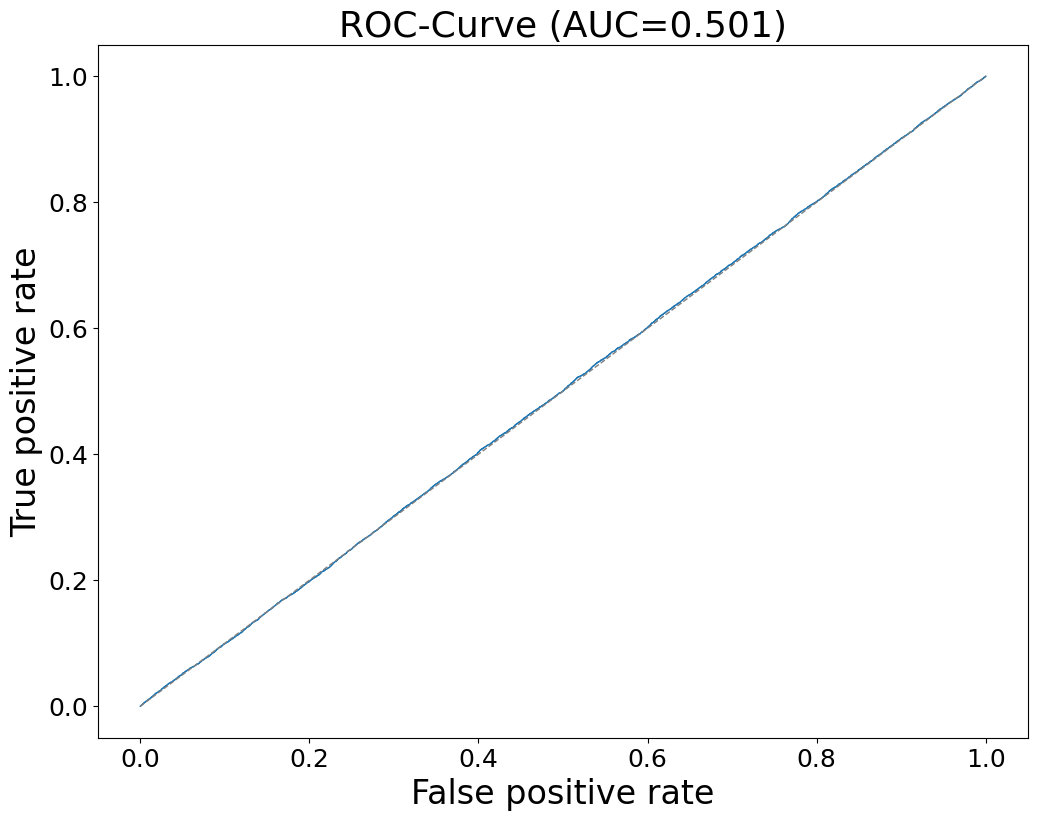

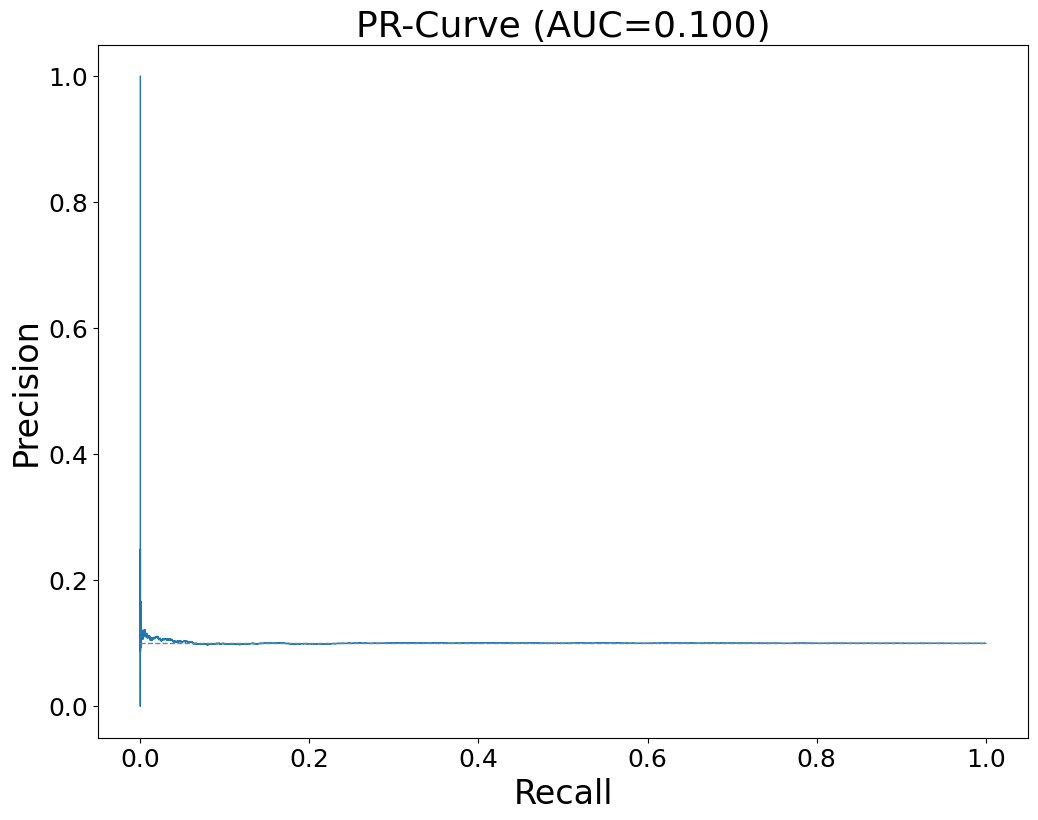

In [3]:
# =============================================================================
# # =============================================================================
# # ROC & PR curves
# # =============================================================================
# =============================================================================


ls_roc_auc, ls_fpr, ls_tpr, ls_pr_auc, ls_precision, ls_recall, pr_no_skill, ls_roc_auc_noskill, ls_fpr_noskill, ls_tpr_noskill = ROC_PR(y_pred_prob, y_test)

#ROC
plt.figure(figsize=(12,9))
#plt.plot(ls_fpr, ls_tpr, lw=1, color=color_ls[met], label=met+" (AUC={})".format(np.round(ls_roc_auc[met],3)))
plt.plot(ls_fpr, ls_tpr, lw=1, label=f"ROC-AUC={ls_roc_auc:.3f}")
plt.plot(ls_fpr_noskill, ls_tpr_noskill, linestyle='--', lw=1, color='gray')  #'No Skill'
plt.ylabel('True positive rate',fontsize=24)
plt.xlabel('False positive rate',fontsize=24)
plt.title(f'ROC-Curve (AUC={ls_roc_auc:.3f})',fontsize=26)
#plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.savefig(visualisation_path + 'ROC_' + planet + '_alpha' + str(alpha) + '_bal' + str(bal) + '_combined_CV_' + str(plotname) + '_version' + str(version) + 'frame' + str(frame) + '_fold' + str(j) + '_js.pdf')
plt.show()


#PR
plt.figure(figsize=(12,9))
#plt.plot(ls_recall, ls_precision[met], lw=1, color=color_ls[met], label=met + " (AUC={})".format(np.round(ls_pr_auc[met],3)))
plt.plot(ls_recall, ls_precision, lw=1, label=f"PR-AUC={ls_pr_auc:.3f}")
plt.plot([0, 1], [pr_no_skill, pr_no_skill], linestyle='--', lw=1, color='gray')
plt.ylabel('Precision',fontsize=24)
plt.xlabel('Recall',fontsize=24)
plt.title(f'PR-Curve (AUC={ls_pr_auc:.3f})',fontsize=26)
#plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.savefig(visualisation_path + 'PR_' + planet + '_alpha' + str(alpha) + '_bal' + str(bal) + '_combined_CV_' + str(plotname) + '_version' + str(version) + 'frame' + str(frame) + '_fold' + str(j) + '_js.pdf')
plt.show()


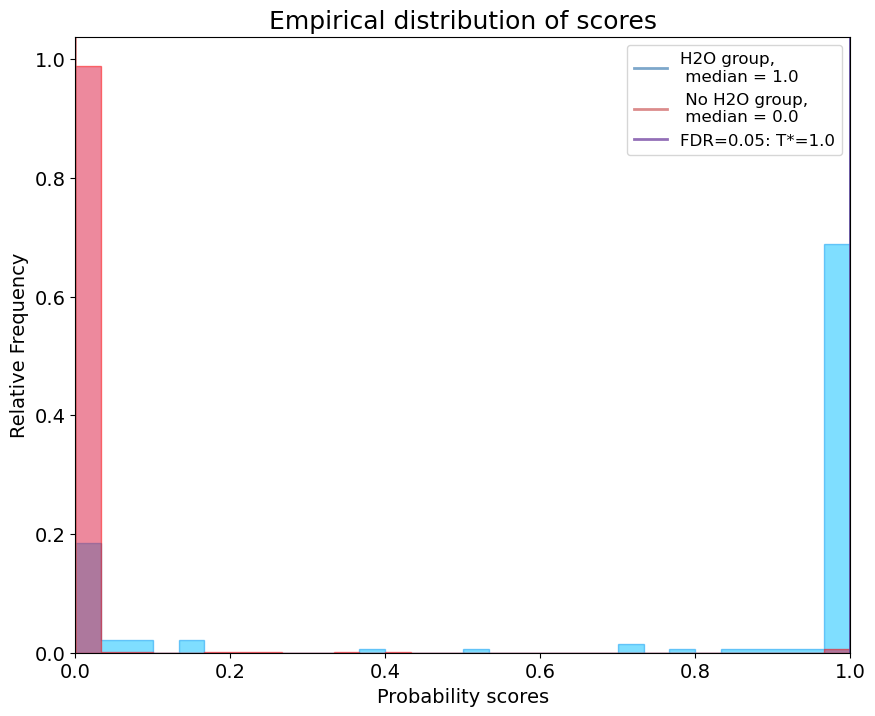

In [20]:

# =============================================================================
# # =============================================================================
# # Histogram
# # =============================================================================
# =============================================================================

prob_treshold = FDRthreshold_js(y_test, y_pred_prob)
CM = confusion_matrix(y_test, y_pred_prob>=prob_treshold)  # [['tn', 'fp'], ['fn', 'tp']]
    
# Plot Histograms
plt.figure(figsize=(10,8))
x1 = np.array(y_pred_prob[y_test == 1])
x1_med = np.median(x1)
weightsx1 = np.ones_like(x1) / len(x1)
x2 = np.array(y_pred_prob[y_test == 0])
x2_med = np.median(x2)
weightsx2 = np.ones_like(x2) / len(x2)
kwargs = dict(histtype='stepfilled', bins=30, density=False)
plt.hist(x1, **kwargs, color='deepskyblue', alpha=0.5, edgecolor='xkcd:azure', weights=weightsx1)
plt.axvline(x1_med, color="steelblue", alpha=0.7, lw=2, label='H2O group,\n median = ' + str(np.round(x1_med, 2)))
plt.hist(x2, **kwargs, color='crimson', alpha=0.5, edgecolor='red', weights=weightsx2)
plt.axvline(x2_med, color="indianred", alpha=0.7, lw=2, label=' No H2O group,\n median = ' + str(np.round(x2_med, 2)))
plt.axvline(prob_treshold, color='rebeccapurple', alpha=0.7, label='FDR=0.05: T*=' + str(np.round(prob_treshold,3)), lw=2) # Threshold for 5% False Discovery Rate (FDR)
plt.ylabel('Relative Frequency', fontsize=14, color='black')
plt.xlabel('Probability scores', fontsize=14, color='black')
plt.xlim([0, 1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Empirical distribution of scores', fontsize=18, color="black")
plt.legend(fontsize=12)
#plt.savefig(visualisation_path + 'Prob_signals_method' + str(met) + 'alpha' + str(alpha) + '_bal' + str(bal) + '_version' + str(version) + 'frame' + str(frame) + '_js.pdf')
plt.show()